In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import json
import cv2
from tqdm import tqdm
from matplotlib.animation import FuncAnimation
from IPython.display import display, HTML
import numpy as np
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
from results import *

expected_num_trials = 30
expected_num_participants = 50
participant_FPS = 30
db_path = "/Users/arijitdasgupta/Desktop/projects/red_green_completed_human_data/pilot2_v0_redgreen.db"  # Update with the path to your .db file
demographic_path = "/Users/arijitdasgupta/Desktop/projects/red_green_completed_human_data/pilot2_v0_demographic.csv"
path_to_data = '/Users/arijitdasgupta/Desktop/projects/mental_physics_trials/pilot'
session_df, trial_df, keystate_df, rgplot_df, valid_trial_ids, global_trial_names = extract_human_data(db_path, path_to_data)
occlusion_durations, occlusion_frames, continuous_occlusion_periods, all_periods_seconds = extract_occlusion_data(path_to_data, participant_FPS)

100%|██████████| 61/61 [01:13<00:00,  1.21s/it]

Summary Statistics of Occlusion Durations:
mean_duration: 3.90
median_duration: 3.90
max_duration: 7.33
min_duration: 0.60
total_scenes_with_occlusion: 44.00

Occlusion Durations (in seconds):
{'E1-1a': 1.9, 'E1-2a': 4.0, 'E1-3a': 2.7333333333333334, 'E1-4a': 7.333333333333333, 'E1-5a': 2.8, 'E1-6a': 6.233333333333333, 'E1-7a': 3.3, 'E1-7b': 2.5, 'E1-8a': 4.866666666666666, 'E1-8b': 4.0, 'E2-1a': 3.7333333333333334, 'E2-2a': 4.566666666666666, 'E2-3a': 5.2, 'E2-4a': 2.966666666666667, 'E2-5a': 6.166666666666667, 'E2-5b': 4.633333333333334, 'E2-6a': 3.066666666666667, 'E2-6b': 2.433333333333333, 'E3-1a': 5.2, 'E3-2a': 3.3, 'E3-3a': 4.466666666666667, 'E3-4a': 3.1666666666666665, 'E3-5a': 6.066666666666666, 'E3-6a': 3.8, 'E4-1a': 2.966666666666667, 'E4-1b': 1.7333333333333334, 'E4-2a': 3.2333333333333334, 'E4-2b': 0.6, 'E5-1a': 5.3, 'E5-1b': 0.8666666666666667, 'E5-2a': 4.7, 'E5-2b': 1.5, 'E5-3a': 5.4, 'E5-3b': 2.7, 'E5-4a': 6.033333333333333, 'E5-4b': 2.5, 'E5-5a': 6.166666666666667, 'E

In [44]:
path_to_data = '/Users/arijitdasgupta/Desktop/projects/mental_physics_trials/pilot_final'
import os
import numpy as np
entries = os.listdir(path_to_data)
e_folders = sorted([entry for entry in entries if entry.startswith('E')])
e_paths = [os.path.join(os.path.join(path_to_data, entry), 'data.npz') for entry in e_folders]
data_npzs = [np.load(e_path, allow_pickle=True) for e_path in e_paths]
position_data = {}
for i in range(len(e_paths)):
    position_data[e_folders[i]] = {
        int(k): {'x': v['x'], 'y': v['y']} for 
        k, v in data_npzs[i].get("step_data", {}).item().items()}

In [41]:
path_to_data = '/Users/arijitdasgupta/Desktop/projects/mental_physics_trials/pilot_final'

entries = os.listdir(path_to_data)
e_folders = sorted([entry for entry in entries if entry.startswith('E')])
e_paths = [os.path.join(os.path.join(path_to_data, entry), 'data.npz') for entry in e_folders]
data_npzs = [np.load(e_path, allow_pickle=True) for e_path in e_paths]

reds = [x.get("rg_outcome").item() == 'red' for x in data_npzs]
greens = [x.get("rg_outcome").item() == 'green' for x in data_npzs]

sum(reds), sum(greens)

(25, 25)

In [20]:
len(position_data)

40

In [ ]:
rgplot_df.to_csv('pilot2_rg_data.csv')

In [ ]:
#####################################################
# Plot pairwise RG plot animations with the stimuli #
#####################################################

pairs = sorted(list(set([x[:-1] for x in global_trial_names])))
for pair in pairs[22:]:
# for pair in selected_pairs:
    trial_a = f"{pair}a"
    trial_b = f"{pair}b"
    print(f"Displaying Pair: {trial_a} and {trial_b}")
    trial_a_data = rgplot_df[rgplot_df["global_trial_name"] == trial_a]
    trial_b_data = rgplot_df[rgplot_df["global_trial_name"] == trial_b]
    animation_html = plot_pair_with_video(path_to_data, trial_a, trial_a_data, trial_b, trial_b_data,participant_FPS)
    display(animation_html)

In [ ]:
###########################################################################################
# Unit test to ensure no duplicated trials and all trials have the appropriate data count #
##########################################################################################
duplicates = find_duplicate_completed_trials(trial_df)
if not duplicates.empty:
    print("Duplicate completed trials found:")
    print(duplicates)
else:
    print("No duplicate completed trials found.")
trial_counts = count_completed_trials_by_global_name(trial_df)
trial_counts[trial_counts['count'] != expected_num_participants//2]

In [ ]:
#######################################################################
# Distribution of scores identified in CURRENT valid participant data #
#######################################################################
plot_scores_distribution(trial_df)

In [ ]:
####################
# Demographic Data #
####################
print_demo_data(session_df, demographic_path)

In [2]:
demo_df = pd.read_csv(demographic_path)
valid_demo_df = session_df.merge(demo_df, left_on='prolific_pid', right_on='Participant id')

/Users/arijitdasgupta/miniconda3/envs/mentalphy/lib/python3.11/site-packages/numpy/_core/numeric.py:457: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')


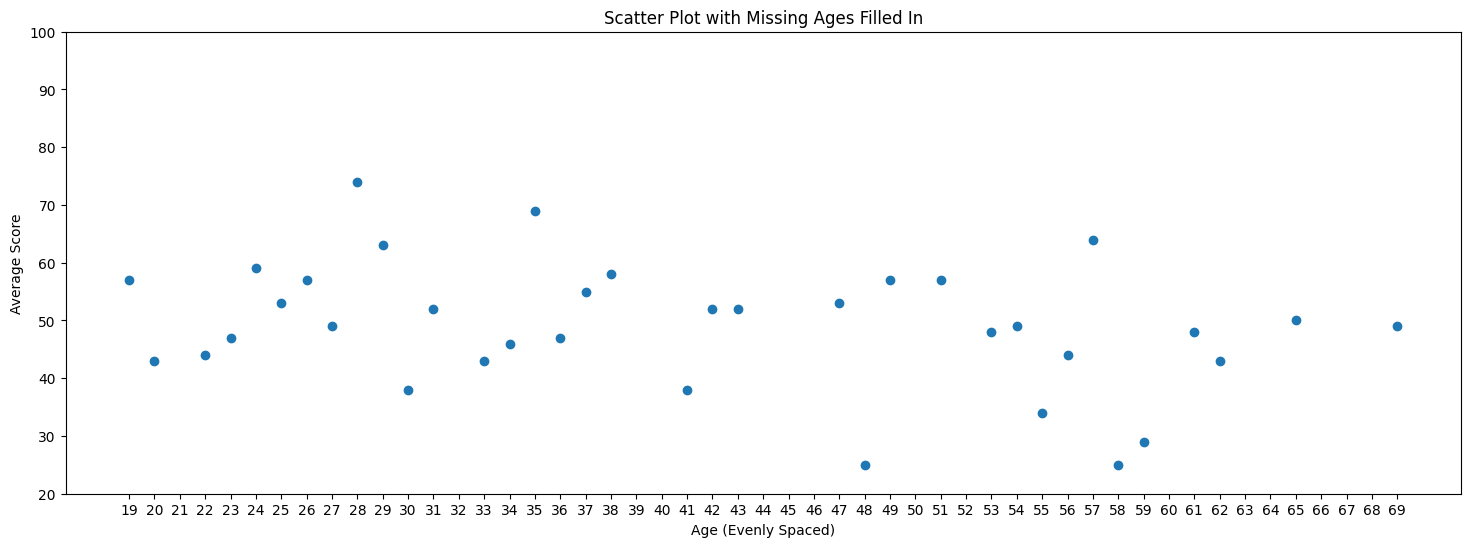

In [18]:
ages = np.array(valid_demo_df['Age'], dtype=int)
average_scores = np.array(valid_demo_df['average_score'], dtype=float)
sorted_indices = np.argsort(ages)
ages = ages[sorted_indices]
average_scores = average_scores[sorted_indices]
# Create a full range of ages (fill in the missing ones)
full_ages = np.arange(ages.min(), ages.max() + 1)

# Map the scores to the corresponding full ages (using NaN for missing values)
full_scores = np.full_like(full_ages, np.nan)  # Initialize with NaN

# Map the available scores to the full_ages
for i, age in enumerate(ages):
    index = np.where(full_ages == age)[0][0]
    full_scores[index] = average_scores[i]

# Create an evenly spaced x-axis (this will not be dependent on the actual ages)
evenly_spaced_x = np.arange(len(full_ages))
plt.figure(figsize=(18, 6))

# Plotting
plt.scatter(evenly_spaced_x, full_scores, label='Average Scores')

# Add labels and title
plt.xlabel('Age (Evenly Spaced)')
plt.ylabel('Average Score')
plt.ylim(20, 100)
plt.title('Scatter Plot with Missing Ages Filled In')
plt.xticks(evenly_spaced_x, full_ages)  # Use full_ages as x-ticks
# Show plot
plt.show()

In [ ]:
[trial_name for trial_name in occlusion_durations.keys() if len(continuous_occlusion_periods[trial_name]) == 1]

In [14]:
import pickle

# Save to a pickle file
with open("pilot2_human_data.pkl", "wb") as f:
    pickle.dump({"Session": session_df, "Trial": trial_df, "KeyState": keystate_df,
        'occlusion_durations' : occlusion_durations, 'continuous_occlusion_periods':
        continuous_occlusion_periods, 'occlusion_frames': occlusion_frames,
        'all_periods_seconds': all_periods_seconds, 'position_data': position_data}, f)


In [45]:
import pickle 

with open("pilot_final_data.pkl", "wb") as f:
    pickle.dump({"position_data": position_data}, f)

In [56]:

NUM_PARTICIPANTS = 30
PARTICIPANT_BUFFER = 15
import random


    
major_path = "/Users/arijitdasgupta/Desktop/projects/red_green_site/backend/data/pilot_final"
f_paths, e_paths, e_folders = get_all_trial_paths(major_path, 14)

Participant 0 took 1 iterations to randomize
Participant 1 took 5 iterations to randomize
Participant 2 took 1 iterations to randomize
Participant 3 took 3 iterations to randomize
Participant 4 took 3 iterations to randomize
Participant 5 took 4 iterations to randomize
Participant 6 took 4 iterations to randomize
Participant 7 took 1 iterations to randomize
Participant 8 took 2 iterations to randomize
Participant 9 took 2 iterations to randomize
Participant 10 took 1 iterations to randomize
Participant 11 took 3 iterations to randomize
Participant 12 took 1 iterations to randomize
Participant 13 took 1 iterations to randomize
Participant 14 took 2 iterations to randomize
Participant 15 took 1 iterations to randomize
Participant 16 took 1 iterations to randomize
Participant 17 took 1 iterations to randomize
Participant 18 took 5 iterations to randomize
Participant 19 took 5 iterations to randomize
Participant 20 took 4 iterations to randomize
Participant 21 took 2 iterations to randomiz

In [47]:
f_paths, e_paths, e_folders

(['/Users/arijitdasgupta/Desktop/projects/red_green_site/backend/data/pilot_final/F1/data.npz',
  '/Users/arijitdasgupta/Desktop/projects/red_green_site/backend/data/pilot_final/F2/data.npz',
  '/Users/arijitdasgupta/Desktop/projects/red_green_site/backend/data/pilot_final/F3/data.npz'],
 [],
 [])